In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv('C://Users//hasan//OneDrive//Desktop//DS//seri4//emtiazy//A_Z Handwritten Data.csv')


In [4]:
# Assuming '0' is the column containing alphabet labels
y = df['0']

# Drop the label column from the feature set
X = df.drop('0', axis=1)


In [5]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = nb_classifier.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Optionally, you can print a classification report for more detailed metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.5518458853537388
              precision    recall  f1-score   support

           0       0.80      0.01      0.02      2806
           1       0.26      0.79      0.39      1673
           2       0.91      0.65      0.76      4742
           3       0.78      0.38      0.51      2044
           4       0.41      0.63      0.50      2214
           5       0.71      0.82      0.76       231
           6       0.28      0.84      0.41      1183
           7       0.17      0.63      0.27      1466
           8       1.00      0.03      0.06       237
           9       1.00      0.00      0.00      1668
          10       0.40      0.00      0.00      1132
          11       0.52      0.86      0.65      2319
          12       0.73      0.83      0.77      2487
          13       0.57      0.44      0.50      3756
          14       0.78      0.90      0.84     11629
          15       0.00      0.00      0.00      3868
          16       0.85      0.08      0.14      115

c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune (if applicable)
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Perform GridSearchCV
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
nb_classifier_tuned = GaussianNB(var_smoothing=best_params['var_smoothing'])
nb_classifier_tuned.fit(X_train, y_train)


GaussianNB(var_smoothing=1e-05)

In [8]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cross_val_scores = cross_val_score(nb_classifier_tuned, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Accuracy:", cross_val_scores.mean())

Cross-Validation Scores: [0.63812257 0.63179621 0.60447711 0.6380051  0.63021882]
Mean CV Accuracy: 0.6285239629480467


In [9]:
# Evaluate the tuned model on the test set
y_pred_tuned = nb_classifier_tuned.predict(X_test)

# Calculate accuracy and other metrics
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Tuned Naive Bayes Accuracy: {accuracy_tuned}')

# Optionally, print a classification report for more detailed metrics
print(classification_report(y_test, y_pred_tuned))


Tuned Naive Bayes Accuracy: 0.632339911397503
              precision    recall  f1-score   support

           0       0.81      0.01      0.02      2806
           1       0.40      0.76      0.52      1673
           2       0.93      0.64      0.76      4742
           3       0.55      0.72      0.62      2044
           4       0.68      0.58      0.62      2214
           5       0.32      0.93      0.48       231
           6       0.41      0.81      0.54      1183
           7       0.26      0.48      0.33      1466
           8       0.19      0.90      0.32       237
           9       0.69      0.15      0.25      1668
          10       0.69      0.02      0.04      1132
          11       0.53      0.80      0.64      2319
          12       0.52      0.89      0.66      2487
          13       0.54      0.54      0.54      3756
          14       0.84      0.87      0.86     11629
          15       0.89      0.58      0.70      3868
          16       0.63      0.61  

c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ga

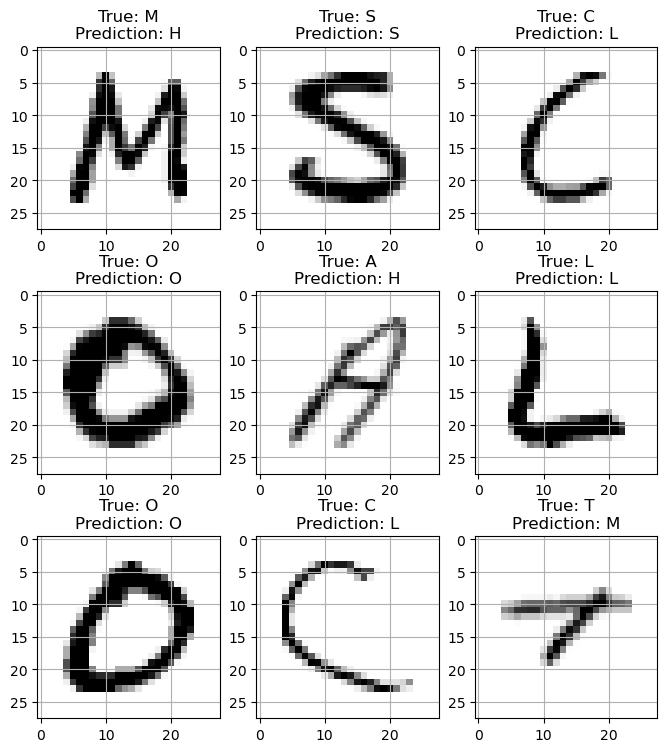

In [12]:
# Assuming 'nb_classifier_tuned' is your tuned Naive Bayes model
fig, axes = plt.subplots(3, 3, figsize=(8, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(X_test.iloc[i, :].values, (28, 28))  # Assuming X_test is a DataFrame
    ax.imshow(img, cmap="Greys")
    
    # Make predictions using the tuned Naive Bayes model
    pred_label = nb_classifier_tuned.predict([X_test.iloc[i, :]])[0]
    pred = word_dict[pred_label]
    
    true_label = word_dict[y_test.iloc[i]]  # Assuming y_test is a Series
    
    ax.set_title(f"True: {true_label}\nPrediction: {pred}")
    ax.grid()

plt.show()
